In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl, matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["figure.edgecolor"] = "black"
plt.rcParams["figure.titlesize"] = 20
plt.rcParams["figure.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

%matplotlib inline

from sklearn import preprocessing

In [2]:
tvdb_series_df = pd.read_csv("data/tvdb.csv", index_col="imdb_id")
my_ratings_df = pd.read_csv("data/my_ratings.csv", index_col="imdb_id")
imdb_series_df = pd.read_csv("data/imdb.csv", index_col="id")

In [3]:
cols_to_use = tvdb_series_df.columns.difference(imdb_series_df.columns)
df1 = pd.merge(imdb_series_df, tvdb_series_df[cols_to_use], how="outer", left_index=True, right_index=True)

cols_to_use = my_ratings_df.columns.difference(df1.columns)
tv_df = pd.merge(df1, my_ratings_df[cols_to_use], how="outer", left_index=True, right_index=True)
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, tt0092337 to tt9827854
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1231 non-null   object 
 1   type                    1231 non-null   object 
 2   start_year              1231 non-null   float64
 3   end_year                745 non-null    float64
 4   ep_length               1218 non-null   float64
 5   n_seasons               1231 non-null   float64
 6   n_episodes              1231 non-null   float64
 7   popularity_rank         1190 non-null   float64
 8   n_ratings               1231 non-null   float64
 9   rating_avg              1231 non-null   float64
 10  rating_top1000          1231 non-null   float64
 11  rating_us               1231 non-null   float64
 12  rating_row              1231 non-null   float64
 13  rating_M                1231 non-null   float64
 14  rating_F                1231 non

# Correlation

In [4]:
corr_matrix = tv_df.corr()

In [5]:
my_rating_corr = corr_matrix["my_rating"]
genres_mask = corr_matrix.filter(like="genre").columns
rating_mask = corr_matrix.filter(like="rating").columns

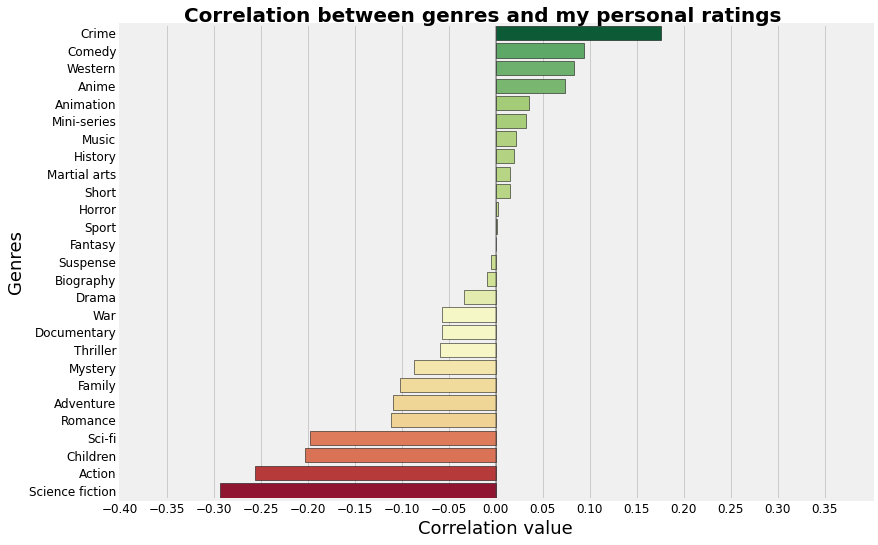

In [6]:
# Sort values.
sorted_corr_genres = my_rating_corr[genres_mask].sort_values(ascending=False)
# Remove nan values.
sorted_corr_genres = sorted_corr_genres[np.logical_not(np.isnan(sorted_corr_genres))]
# Normalize values to assign proper colors.
norm_sorted_corr_genres = preprocessing.MinMaxScaler().fit_transform(sorted_corr_genres.values.reshape(-1,1)).flatten()
# Prettify labels on y axis.
labels = [l.split("_")[1].capitalize() for l in sorted_corr_genres.index]

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(y=labels, x=sorted_corr_genres, ax=ax, palette=mpl.cm.RdYlGn(norm_sorted_corr_genres), edgecolor="black")
ax.axvline(color='#414141', linewidth=1.5, alpha=.5)

plt.suptitle("Correlation between genres and my personal ratings")
plt.subplots_adjust(top=0.95)
ax.set_xlim(-0.4,0.4)
ax.xaxis.set_ticks(np.arange(-0.4, 0.4, 0.05))
ax.set_xlabel("Correlation value")
ax.set_ylabel("Genres")

plt.show()

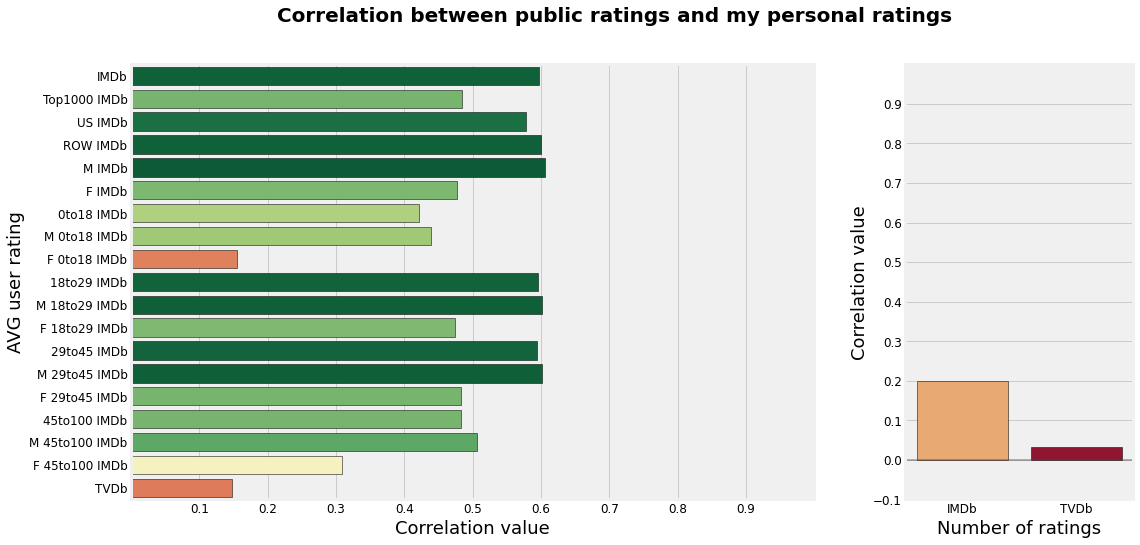

In [7]:
sorted_corr_rating = my_rating_corr[rating_mask].drop("my_rating")
norm_sorted_corr_rating = preprocessing.MinMaxScaler().fit_transform(sorted_corr_rating.values.reshape(-1,1)).flatten()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), gridspec_kw={"width_ratios": [3, 1]})
plt.suptitle("Correlation between public ratings and my personal ratings")

# PLOT 1
y1 = sorted_corr_rating[1:-1]
x1 = ["IMDb", "Top1000 IMDb", "US IMDb", "ROW IMDb", "M IMDb", "F IMDb", 
      "0to18 IMDb", "M 0to18 IMDb", "F 0to18 IMDb", 
      "18to29 IMDb", "M 18to29 IMDb", "F 18to29 IMDb", 
      "29to45 IMDb", "M 29to45 IMDb", "F 29to45 IMDb", 
      "45to100 IMDb", "M 45to100 IMDb", "F 45to100 IMDb", "TVDb"]
palette1 = mpl.cm.RdYlGn(norm_sorted_corr_rating[1:-1])

sns.barplot(y=x1, x=y1, ax=ax1, palette=palette1, edgecolor="black")
ax1.axvline(color='#414141', linewidth=1.5, alpha=.5)

ax1.set_ylabel("AVG user rating")
# ax1.set_yticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_xlim(0,1.0)
ax1.xaxis.set_ticks(np.arange(0.1, 1.0, 0.10))
ax1.set_xlabel("Correlation value")

# PLOT 2
x2 = ["IMDb", "TVDb"]
y2 = list((sorted_corr_rating[0], sorted_corr_rating[-1]))
palette2 = mpl.cm.RdYlGn(list((norm_sorted_corr_rating[0], norm_sorted_corr_rating[-1])))

sns.barplot(x=x2, y=y2, ax=ax2, palette=palette2, edgecolor="black")
ax2.axhline(color='#414141', linewidth=1.5, alpha=.5)

ax2.set_ylim(-0.1,1)
ax2.yaxis.set_ticks(np.arange(-0.1, 1, 0.10))
ax2.set_xlabel("Number of ratings")
ax2.set_ylabel("Correlation value")

plt.show()

I am a 25 yo male from Italy, and we can notice here how my personal ratings have a good positive correlation with the ratings given by users similar to me.

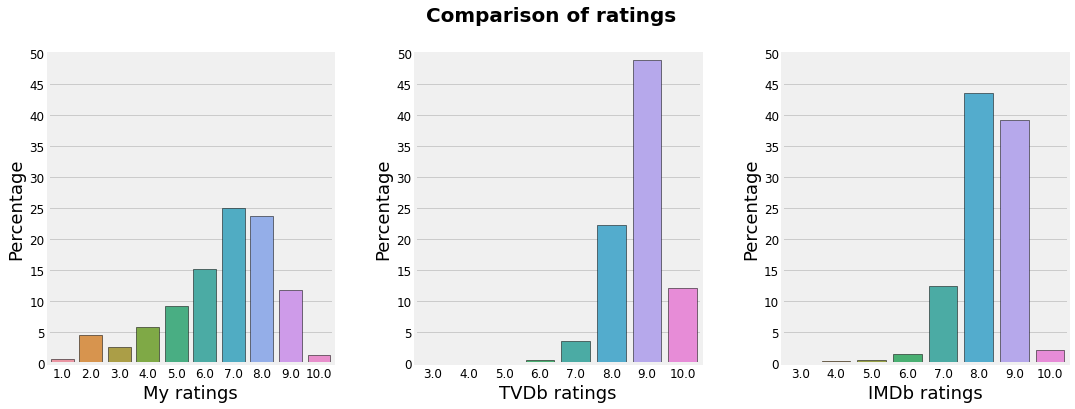

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), gridspec_kw={"width_ratios": [1, 1, 1]})
fig.tight_layout(pad=5.0)
fig.suptitle("Comparison of ratings")

#sns.countplot(x=tv_df["my_rating"], ax=ax1, edgecolor="#000000")
sns.barplot(x="my_rating", y="my_rating", data=tv_df, estimator=lambda x: len(x) / len(tv_df['my_rating'].dropna()) * 100, ax=ax1, edgecolor="#000000")
ax1.set_xlabel("My ratings")
ax1.set_ylim(0, 50)
ax1.yaxis.set_ticks(np.arange(0, 51, 5))
ax1.set_ylabel('Percentage')

# Discretizing and plotting TVDb ratings.
discretized = pd.cut(tv_df["tvdb_avg_rating"], bins=range(1,11)).map(lambda x: x.right)
ratings = pd.DataFrame(pd.to_numeric(discretized))
sns.barplot(x="tvdb_avg_rating", y="tvdb_avg_rating", data=ratings, estimator=lambda x: len(x) / len(ratings) * 100, ax=ax2, edgecolor="#000000")
ax2.set_xlabel("TVDb ratings")
ax2.set_ylim(0, 50)
ax2.yaxis.set_ticks(np.arange(0, 51, 5))
ax2.set_ylabel('Percentage')

# Discretizing and plotting IMDb ratings.
discretized = pd.cut(tv_df["rating_avg"], bins=range(1,11)).map(lambda x: x.right)
ratings = pd.DataFrame(pd.to_numeric(discretized))
sns.barplot(x="rating_avg", y="rating_avg", data=ratings, estimator=lambda x: len(x) / len(ratings) * 100, ax=ax3, edgecolor="#000000")
ax3.set_xlabel("IMDb ratings")
ax3.yaxis.set_ticks(np.arange(0, 51, 5))
ax3.set_ylim(0, 50)
ax3.set_ylabel('Percentage')

plt.show()

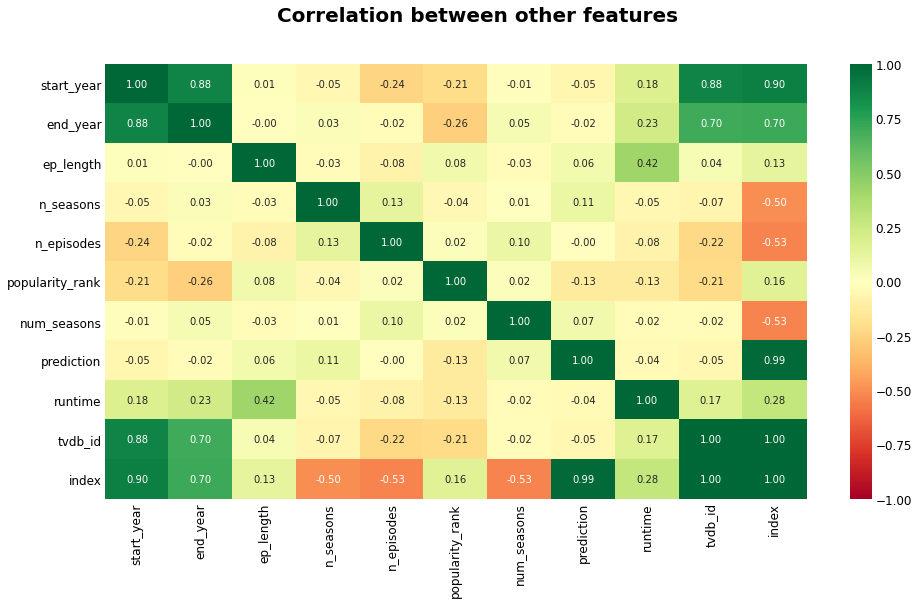

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))
mask = rating_mask.append(genres_mask)
plt.suptitle("Correlation between other features", x=0.45, ha="center")

ax = sns.heatmap(tv_df.drop(mask, axis=1).corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="RdYlGn")
plt.show()

## Interesting data

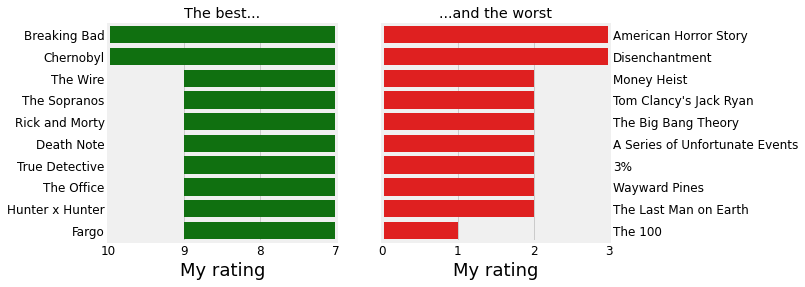

In [10]:
best = tv_df.sort_values(by=["my_rating", "rating_avg"], ascending=False)[:10]
worst = tv_df.sort_values(by=["my_rating", "rating_avg"], ascending=True)[:10].iloc[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

subset = best.append(worst)

# PLOT 1
sns.barplot(x="my_rating", y="name", data=best, ax=ax1, color="green")
ax1.set_title("The best...")
ax1.xaxis.set_ticks(np.arange(7, 11, 1))
ax1.set_xlim(7,10)
ax1.set_xlabel('My rating')
ax1.set_ylabel('')
ax1.yaxis.tick_left()
# Invert the order of x-axis values.
ax1.set_xlim(ax1.get_xlim()[::-1])

# PLOT 2
sns.barplot(x="my_rating", y="name", data=worst, ax=ax2, color="red")
ax2.set_title("...and the worst")
ax2.xaxis.set_ticks(np.arange(0, 4, 1))
ax2.set_xlim(0,3)
ax2.set_xlabel('My rating')
ax2.set_ylabel('')
# Move ticks to the right.
ax2.yaxis.tick_right()

plt.show()

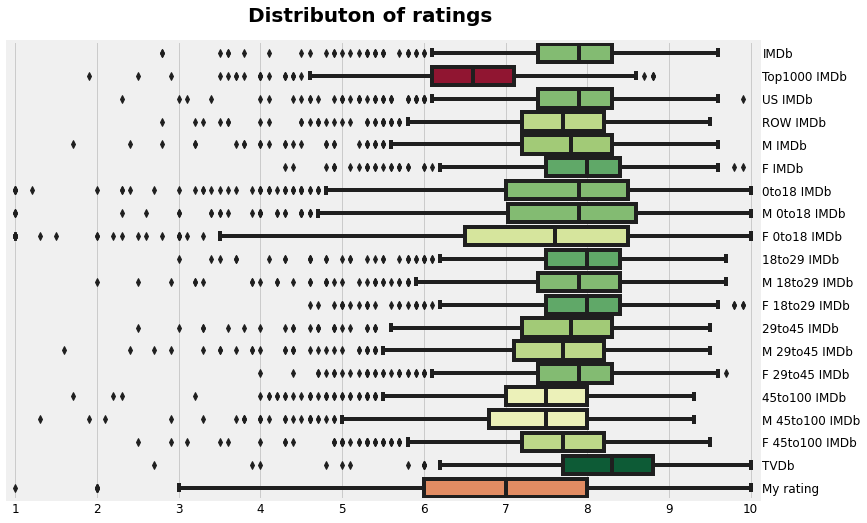

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

cols = list(rating_mask.drop(["n_ratings", "tvdb_ratings"]))
medians = tv_df[cols].median()
norm_medians = preprocessing.MinMaxScaler().fit_transform(medians.values.reshape(-1,1)).flatten()
palette = mpl.cm.RdYlGn(norm_medians)
labels = ["IMDb", "Top1000 IMDb", "US IMDb", "ROW IMDb", "M IMDb", "F IMDb", 
      "0to18 IMDb", "M 0to18 IMDb", "F 0to18 IMDb", 
      "18to29 IMDb", "M 18to29 IMDb", "F 18to29 IMDb", 
      "29to45 IMDb", "M 29to45 IMDb", "F 29to45 IMDb", 
      "45to100 IMDb", "M 45to100 IMDb", "F 45to100 IMDb", "TVDb", "My rating"]

sns.boxplot(data=tv_df[cols], orient="h", palette=palette)

plt.suptitle("Distributon of ratings")
plt.subplots_adjust(top=0.92)
ax.set_xlim(0.9,10.1)
ax.xaxis.set_ticks(np.arange(1, 11, 1))
ax.set_yticklabels(labels)
ax.yaxis.tick_right()

plt.show()

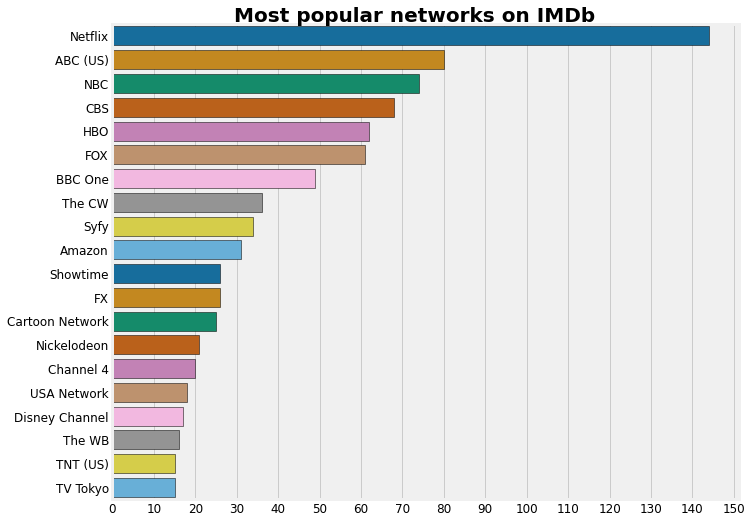

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

values = tv_df["network"].value_counts()[:20]

sns.barplot(x=values.values, y=values.index, palette="colorblind", edgecolor="black")

plt.suptitle("Most popular networks on IMDb")
plt.subplots_adjust(top=0.95)
ax.xaxis.set_ticks(np.arange(0,151,10))

plt.show()

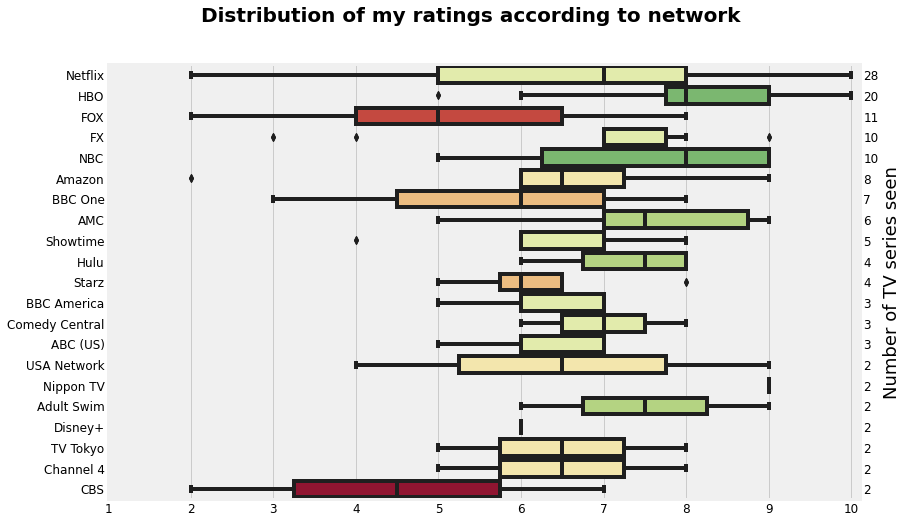

In [13]:
rated_mask = tv_df["my_rating"].notna()

# Keep only the networks with multiple TV series seen.
grouped_count = tv_df[rated_mask].groupby(["network"]).count()["my_rating"].sort_values(ascending=False)
grouped_count = grouped_count[grouped_count > 1]

grouped_medians = tv_df[rated_mask].groupby(["network"]).median()["my_rating"].sort_values(ascending=False)
grouped_medians = grouped_medians[grouped_count.index]

fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()
plt.suptitle("Distribution of my ratings according to network")

# Normalize the medians in the interval 0 to 1.
norm_medians = preprocessing.MinMaxScaler().fit_transform(grouped_medians.values.reshape(-1,1)).flatten()
# Create a Series holding the normalized median for each network.
temp = pd.Series(norm_medians, index=grouped_medians.index)
temp = temp.reindex(index=grouped_count.index)

palette = mpl.cm.RdYlGn(temp)

# Plot my ratings for each network.
sns.boxplot(data=tv_df[rated_mask], x="my_rating", y="network", order=grouped_count[grouped_count>1].index, palette=palette, ax=ax1)
ax1.set_xlabel('')
ax1.xaxis.set_ticks(np.arange(1, 11, 1))
ax1.set_xlim(1,10.1)
ax1.set_ylabel('')

# Plot count of TV series for each network.
sns.boxplot(data=tv_df[rated_mask], x="my_rating", y="network", order=grouped_count[grouped_count>1].index, palette=palette, ax=ax2)
ax2.set_ylabel("Number of TV series seen")
ax2.tick_params('y')
ax2.set_yticklabels(grouped_count[grouped_count>1].values)

plt.show()